In [3]:
import os

workers = os.cpu_count()
if 'sched_getaffinity' in dir(os):
    workers = len(os.sched_getaffinity(0))
print('number of cpus:', workers)

import re
with open('/proc/meminfo') as f:
    meminfo = f.read()
matched = re.search(r'^MemTotal:\s+(\d+)', meminfo)
if matched:
    mem_total_kB = int(matched.groups()[0])

print('memory available (GB):', mem_total_kB / 1024 / 1024)

number of cpus: 1
memory available (GB): 376.5783004760742


In [4]:
import time
import pandas as pd
start_time = time.time()
# merged_filtered.to_pickle('../mturk_mar6/boundary/merged_filtered.pickle')
merged_filtered = pd.read_pickle('../mturk_mar6/boundary/merged_filtered.pickle')
print('time taken for pickle filtered:', str(time.time() - start_time), 'seconds')

start_time = time.time()
merged_random = pd.read_pickle('../mturk_mar6/boundary/merged_random.pickle')
# merged_random.to_pickle('../mturk_mar6/boundary/merged_random.pickle')
print('time taken for pickle random:', str(time.time() - start_time), 'seconds')

time taken for pickle filtered: 49.76583528518677 seconds
time taken for pickle random: 57.09994554519653 seconds


In [5]:
merged_filtered.head()

,tweet_id,text,fired,hired,job,laid_off,position,quit,unemployed,work,keyword,search_model,unemployed_model,offer_model,hired_model,loss_model
0,276933934124765184,Damn i have to much homework,False,False,False,False,False,False,False,True,True,0.147405,0.241236,0.022598,0.103680,0.100251
1,277143632232992768,Does a bedazzler work on leather? Serious ques...,False,False,False,False,False,False,False,True,True,0.107181,0.086224,0.027650,0.050369,0.041638
2,277150490276540416,RT @porcelain10: Washington Post D Milbank bas...,False,False,False,False,False,False,False,True,True,0.056218,0.043985,0.068802,0.030496,0.026274
3,277151157208637440,Finally off work,False,False,False,False,False,False,False,True,True,0.116126,0.249706,0.021815,0.125334,0.155337
4,277175194454462465,Irrational: No BioShock PS Vita until Sony and...,False,False,False,False,False,False,False,True,True,0.051089,0.039643,0.094447,0.028988,0.023893


No handles with labels found to put in legend.


offer_model plot filtered time taken: 1.5007743835449219 seconds


No handles with labels found to put in legend.


search_model plot filtered time taken: 1.6083109378814697 seconds


No handles with labels found to put in legend.


unemployed_model plot filtered time taken: 1.7365856170654297 seconds


No handles with labels found to put in legend.


hired_model plot filtered time taken: 1.5691146850585938 seconds


No handles with labels found to put in legend.


loss_model plot filtered time taken: 1.6247317790985107 seconds


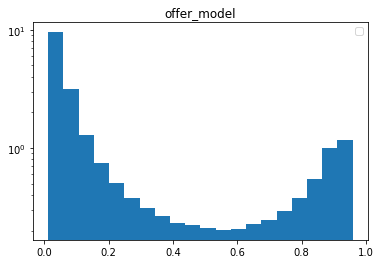

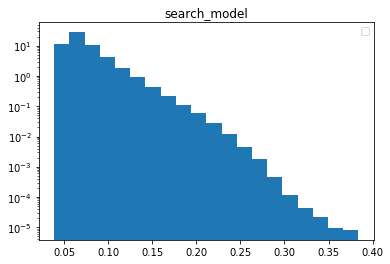

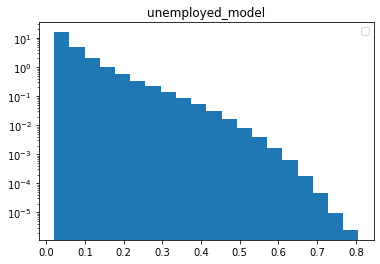

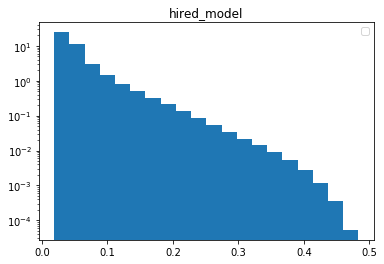

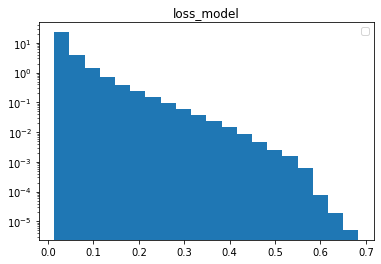

In [8]:
boundary = 0.5
topN = 100
columns = ['offer_model','search_model','unemployed_model','hired_model','loss_model']

import matplotlib.pyplot as plt

for column in columns:
    boundary_data = merged_filtered
    boundary_data['dist_point5'] = abs(merged_filtered[column] - boundary)

    start_time = time.time()
    print(column, 'subtraction time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    boundary_data = boundary_data.sort_values(by=['dist_point5'], ascending=True)
    print(column, 'sorting time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    boundary_data[:topN].to_csv('../mturk_mar6/boundary/filtered_{}.csv'.format(column))
    # print(all_filtered_boundary['text'])
    print(column, 'write csv time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(merged_filtered[column], bins=20, density = True)
    ax.set_yscale('log')
    # plt..yscale(value)
    plt.title(column)
    ax.legend()
    #plt.show()
    plt.savefig('../mturk_mar6/boundary/filtered_{}_log.png'.format(column))

    print(column, 'plot filtered time taken:', str(time.time() - start_time), 'seconds')


offer_model subtraction time taken: 5.0067901611328125e-06 seconds
offer_model sorting time taken: 89.33081579208374 seconds
offer_model write csv time taken: 0.006337165832519531 seconds


No handles with labels found to put in legend.


offer_model plot random time taken: 1.5453321933746338 seconds
search_model subtraction time taken: 5.245208740234375e-06 seconds
search_model sorting time taken: 80.97928738594055 seconds
search_model write csv time taken: 0.01869821548461914 seconds


No handles with labels found to put in legend.


search_model plot random time taken: 1.6247198581695557 seconds
unemployed_model subtraction time taken: 5.245208740234375e-06 seconds
unemployed_model sorting time taken: 80.69047117233276 seconds
unemployed_model write csv time taken: 0.009378194808959961 seconds


No handles with labels found to put in legend.


unemployed_model plot random time taken: 1.7465968132019043 seconds
hired_model subtraction time taken: 3.5762786865234375e-06 seconds
hired_model sorting time taken: 80.87389540672302 seconds
hired_model write csv time taken: 0.11455154418945312 seconds


No handles with labels found to put in legend.


hired_model plot random time taken: 1.6062498092651367 seconds
loss_model subtraction time taken: 3.0994415283203125e-06 seconds
loss_model sorting time taken: 80.9403624534607 seconds
loss_model write csv time taken: 0.006195783615112305 seconds


No handles with labels found to put in legend.


loss_model plot random time taken: 1.665257453918457 seconds


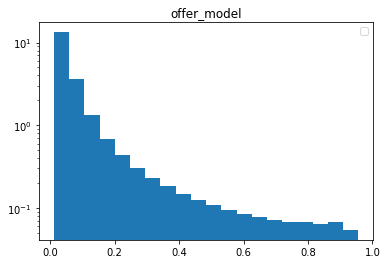

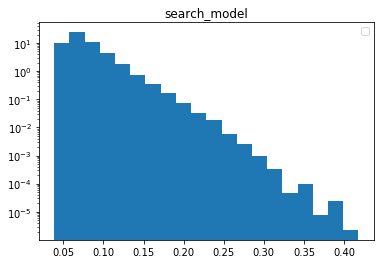

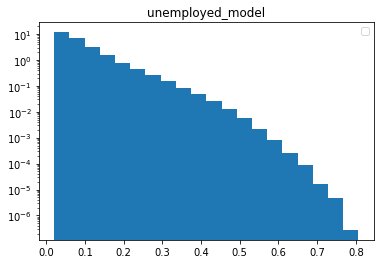

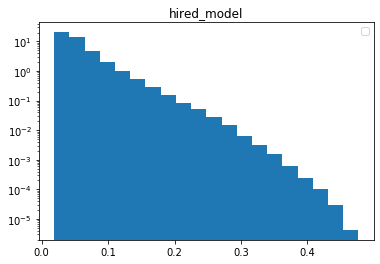

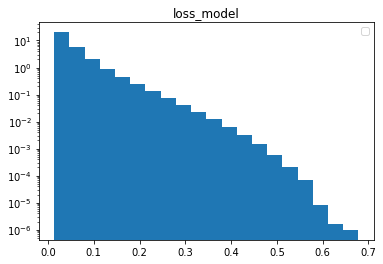

In [9]:
boundary = 0.5
topN = 100
columns = ['offer_model','search_model','unemployed_model','hired_model','loss_model']

import matplotlib.pyplot as plt

for column in columns:
    # all_random_boundary = merged_random.loc[(merged_random[column] >= threshold - boundary_width) &
                                                # (merged_random[column] <= threshold + boundary_width)]
    boundary_data = merged_random
    boundary_data['dist_point5'] = abs(merged_random[column] - boundary)

    start_time = time.time()
    print(column, 'subtraction time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    boundary_data = boundary_data.sort_values(by=['dist_point5'], ascending=True)
    print(column, 'sorting time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    boundary_data[:topN].to_csv('../mturk_mar6/boundary/random_{}.csv'.format(column))
    # print(all_random_boundary['text'])
    print(column, 'write csv time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(merged_random[column], bins=20, density = True)
    ax.set_yscale('log')
    # plt..yscale(value)
    plt.title(column)
    ax.legend()
    #plt.show()
    plt.savefig('../mturk_mar6/boundary/random_{}_log.png'.format(column))

    print(column, 'plot random time taken:', str(time.time() - start_time), 'seconds')
